In [1]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import folium 
#import geohash2
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools


In [3]:
#!pip install geohash2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for geohash2: filename=geohash2-1.1-py3-none-any.whl size=15557 sha256=c5f44eba7280aef7695100fa2730c936a1ee418f27285b9d7900fb2483b19f6c
  Stored in directory: /root/.cache/pip/wheels/ec/29/ab/aa2b0265ceaef06eac4aed2ca6ae1b17eb2ffb14d611f20172
Successfully built geohash2


Loading Datasheet


In [2]:
taxi_datafile ="/content/drive/MyDrive/Neural Networks/yellow_tripdata_2016-03.csv"
df= pd.read_csv(taxi_datafile)


In [3]:
df.shape

(12210952, 19)

In [4]:
df = df[:600000]
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2016-03-01 00:00:00   2016-03-01 00:07:55                1   
1         1  2016-03-01 00:00:00   2016-03-01 00:11:06                1   
2         2  2016-03-01 00:00:00   2016-03-01 00:31:06                2   
3         2  2016-03-01 00:00:00   2016-03-01 00:00:00                3   
4         2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           2.50        -73.976746        40.765152           1   
1           2.90        -73.983482        40.767925           1   
2          19.98        -73.782021        40.644810           1   
3          10.78        -73.863419        40.769814           1   
4          30.43        -73.971741        40.792183           3   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -74.004265         40.746128             1   
1                  N         -74.005943         40.733166             1   
2                  N         -73.974541         40.675770             1   
3                  N         -73.969650         40.757767             1   
4                  N         -74.177170         40.695053             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          9.0    0.5      0.5        2.05          0.00   
1         11.0    0.5      0.5        3.05          0.00   
2         54.5    0.5      0.5        8.00          0.00   
3         31.5    0.0      0.5        3.78          5.54   
4         98.0    0.0      0.0        0.00         15.50   

   improvement_surcharge  total_amount  
0                    0.3         12.35  
1                    0.3         15.35  
2                    0.3         63.80  
3                    0.3         41.62  
4                    0.3        113.80

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               600000 non-null  int64  
 1   tpep_pickup_datetime   600000 non-null  object 
 2   tpep_dropoff_datetime  600000 non-null  object 
 3   passenger_count        600000 non-null  int64  
 4   trip_distance          600000 non-null  float64
 5   pickup_longitude       600000 non-null  float64
 6   pickup_latitude        600000 non-null  float64
 7   RatecodeID             600000 non-null  int64  
 8   store_and_fwd_flag     600000 non-null  object 
 9   dropoff_longitude      600000 non-null  float64
 10  dropoff_latitude       600000 non-null  float64
 11  payment_type           600000 non-null  int64  
 12  fare_amount            600000 non-null  float64
 13  extra                  600000 non-null  float64
 14  mta_tax                600000 non-nu

In [6]:
df.drop_duplicates()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              1  2016-03-01 00:00:00   2016-03-01 00:07:55                1   
1              1  2016-03-01 00:00:00   2016-03-01 00:11:06                1   
2              2  2016-03-01 00:00:00   2016-03-01 00:31:06                2   
3              2  2016-03-01 00:00:00   2016-03-01 00:00:00                3   
4              2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   
...          ...                  ...                   ...              ...   
599995         2  2016-03-02 11:26:40   2016-03-02 11:29:11                2   
599996         2  2016-03-02 11:26:40   2016-03-02 11:43:24                2   
599997         2  2016-03-02 11:26:40   2016-03-02 11:30:06                1   
599998         2  2016-03-02 11:26:40   2016-03-02 11:38:32                1   
599999         1  2016-03-02 11:26:41   2016-03-02 12:09:22                1   

        trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0                2.50        -73.976746        40.765152           1   
1                2.90        -73.983482        40.767925           1   
2               19.98        -73.782021        40.644810           1   
3               10.78        -73.863419        40.769814           1   
4               30.43        -73.971741        40.792183           3   
...               ...               ...              ...         ...   
599995           0.36        -73.986328        40.732922           1   
599996           1.87        -73.979172        40.747150           1   
599997           0.73        -73.985413        40.768517           1   
599998           1.64        -73.988701        40.744919           1   
599999           4.40        -73.972252        40.796608           1   

       store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                       N         -74.004265         40.746128             1   
1                       N         -74.005943         40.733166             1   
2                       N         -73.974541         40.675770             1   
3                       N         -73.969650         40.757767             1   
4                       N         -74.177170         40.695053             1   
...                   ...                ...               ...           ...   
599995                  N         -73.981171         40.733158             1   
599996                  N         -73.979736         40.765671             1   
599997                  N         -73.993294         40.762947             1   
599998                  N         -74.000137         40.726959             1   
599999                  N         -73.979652         40.749275             1   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0               9.0    0.5      0.5        2.05          0.00   
1              11.0    0.5      0.5        3.05          0.00   
2              54.5    0.5      0.5        8.00          0.00   
3              31.5    0.0      0.5        3.78          5.54   
4              98.0    0.0      0.0        0.00         15.50   
...             ...    ...      ...         ...           ...   
599995          4.0    0.0      0.5        0.96          0.00   
599996         12.0    0.0      0.5        1.00          0.00   
599997          4.5    0.0      0.5        1.59          0.00   
599998          9.0    0.0      0.5        1.96          0.00   
599999         27.0    0.0      0.5        5.00          0.00   

        improvement_surcharge  total_amount  
0                         0.3         12.35  
1                         0.3         15.35  
2                         0.3         63.80  
3                         0.3         41.62  
4                         0.3        113.80  
...                       ...           ...  
599995                    0.3          5.76  
599996                    0.3         13.80  
599997                    

In [7]:
df.shape

(600000, 19)

In [8]:
df.describe()

VendorID  passenger_count  trip_distance  pickup_longitude  \
count  600000.000000    600000.000000   6.000000e+05     600000.000000   
mean        1.607990         1.681753   1.115246e+01        -73.025875   
std         0.488199         1.375267   6.454970e+03          8.318212   
min         1.000000         0.000000   0.000000e+00       -121.933327   
25%         1.000000         1.000000   9.900000e-01        -73.991051   
50%         2.000000         1.000000   1.600000e+00        -73.980103   
75%         2.000000         2.000000   2.950000e+00        -73.964996   
max         2.000000         8.000000   5.000000e+06          0.000000   

       pickup_latitude     RatecodeID  dropoff_longitude  dropoff_latitude  \
count    600000.000000  600000.000000      600000.000000     600000.000000   
mean         40.231026       1.035852         -73.083711         40.262799   
std           4.582045       0.496414           8.065951          4.443332   
min           0.000000       1.000000        -121.933327          0.000000   
25%          40.739506       1.000000         -73.990639         40.738453   
50%          40.755638       1.000000         -73.978691         40.755474   
75%          40.769405       1.000000         -73.962883         40.769440   
max          43.563965      99.000000           0.000000         43.563965   

        payment_type    fare_amount          extra        mta_tax  \
count  600000.000000  600000.000000  600000.000000  600000.000000   
mean        1.321627      12.490533       0.282569       0.497711   
std         0.479597      10.629177       0.459752       0.036937   
min         1.000000     -62.000000      -4.500000      -0.500000   
25%         1.000000       6.500000       0.000000       0.500000   
50%         1.000000       9.500000       0.000000       0.500000   
75%         2.000000      14.000000       0.500000       0.500000   
max         4.000000     819.500000      51.000000       0.500000   

          tip_amount   tolls_amount  improvement_surcharge   total_amount  
count  600000.000000  600000.000000          600000.000000  600000.000000  
mean        1.822604       0.313158               0.299667      15.706231  
std         2.479539       2.023231               0.013557      13.327389  
min        -2.700000       0.000000              -0.300000     -62.800000  
25%         0.000000       0.000000               0.300000       8.300000  
50%         1.360000       0.000000               0.300000      11.760000  
75%         2.360000       0.000000               0.300000      17.250000  
max       218.950000     908.070000               0.300000     934.370000

In [9]:
## Missing Value
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [10]:
df.shape

(600000, 19)

In [11]:
##Delete trips with zero duration, zero number of passengers, zero trip distance by meter
df= df.loc[(df['trip_distance']!=0)&(df['passenger_count']!=0)]
df = df.loc[(df['tpep_pickup_datetime']!= df['tpep_dropoff_datetime'])]

In [12]:
df.shape

(596726, 19)

In [13]:
df['tpep_pickup_datetime'].unique()

array(['2016-03-01 00:00:00', '2016-03-01 00:00:01',
       '2016-03-01 00:00:02', ..., '2016-03-02 11:26:39',
       '2016-03-02 11:26:40', '2016-03-02 11:26:41'], dtype=object)

In [14]:
# Correct the date and time format (tpep_pickup_datetime)
def convert_to_unix(s):
   s_str = str(s)
   return time.mktime(datetime.datetime.strptime(s_str, "%Y-%m-%d %H:%M:%S").timetuple())



def return_with_trip_times(df):
    duration = df[['tpep_pickup_datetime','tpep_dropoff_datetime']]
    #pickups and dropoffs to unix time
    pickup = [convert_to_unix(x) for x in duration['tpep_pickup_datetime'].values]
    dropoff = [convert_to_unix(x) for x in duration['tpep_dropoff_datetime'].values]
    #calculate duration of trips
    durations = (np.array(dropoff) - np.array(pickup))/float(60)
    #append durations of trips and speed in miles/hr to a new dataframe
    Year =df['tpep_pickup_datetime'].str.split('-').str[0]
    Month =df['tpep_pickup_datetime'].str.split('-').str[1]
    Date =df['tpep_pickup_datetime'].str.split('-').str[2]
    new_df = df[['VendorID','passenger_count','trip_distance', 'pickup_longitude','pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','RatecodeID','payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge','total_amount']].copy()
    
    new_df .loc[:, 'trip_times'] = durations
    new_df .loc[:, 'pickup_times'] = pickup
    new_df .loc[:, 'Speed'] = 60*(new_df['trip_distance']/new_df['trip_times'])
    new_df .loc[:, 'Date'] = Date
    new_df .loc[:, 'Month'] = Month
    new_df .loc[:, 'Year'] = Year
    
    
    return new_df 

df= return_with_trip_times(df)


In [15]:
for n in df.index:
    df["Date"][int(n)] = df["Date"][int(n)][:2]

In [16]:
df.tail()

VendorID  passenger_count  trip_distance  pickup_longitude  \
599995         2                2           0.36        -73.986328   
599996         2                2           1.87        -73.979172   
599997         2                1           0.73        -73.985413   
599998         2                1           1.64        -73.988701   
599999         1                1           4.40        -73.972252   

        pickup_latitude  dropoff_longitude  dropoff_latitude  RatecodeID  \
599995        40.732922         -73.981171         40.733158           1   
599996        40.747150         -73.979736         40.765671           1   
599997        40.768517         -73.993294         40.762947           1   
599998        40.744919         -74.000137         40.726959           1   
599999        40.796608         -73.979652         40.749275           1   

        payment_type  fare_amount  ...  tip_amount  tolls_amount  \
599995             1          4.0  ...        0.96           0.0   
599996             1         12.0  ...        1.00           0.0   
599997             1          4.5  ...        1.59           0.0   
599998             1          9.0  ...        1.96           0.0   
599999             1         27.0  ...        5.00           0.0   

        improvement_surcharge  total_amount  trip_times  pickup_times  \
599995                    0.3          5.76    2.516667  1.456918e+09   
599996                    0.3         13.80   16.733333  1.456918e+09   
599997                    0.3          6.89    3.433333  1.456918e+09   
599998                    0.3         11.76   11.866667  1.456918e+09   
599999                    0.3         32.80   42.683333  1.456918e+09   

            Speed  Date  Month  Year  
599995   8.582781    02     03  2016  
599996   6.705179    02     03  2016  
599997  12.757282    02     03  2016  
599998   8.292135    02     03  2016  
599999   6.185084    02     03  2016  

[5 rows x 22 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596726 entries, 0 to 599999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               596726 non-null  int64  
 1   passenger_count        596726 non-null  int64  
 2   trip_distance          596726 non-null  float64
 3   pickup_longitude       596726 non-null  float64
 4   pickup_latitude        596726 non-null  float64
 5   dropoff_longitude      596726 non-null  float64
 6   dropoff_latitude       596726 non-null  float64
 7   RatecodeID             596726 non-null  int64  
 8   payment_type           596726 non-null  int64  
 9   fare_amount            596726 non-null  float64
 10  extra                  596726 non-null  float64
 11  mta_tax                596726 non-null  float64
 12  tip_amount             596726 non-null  float64
 13  tolls_amount           596726 non-null  float64
 14  improvement_surcharge  596726 non-nu

In [15]:
pickup_longitude = 40.496
pickup_latitude = -74.25
geo = geohash2.encode(pickup_longitude, pickup_latitude, precision=5)
map = folium.Map(location=[pickup_longitude, pickup_latitude], zoom_start=12)
folium.Marker(location=[pickup_longitude, pickup_latitude], tooltip=geo).add_to(map)
map


In [18]:
df.shape

(596726, 22)

Numerical Features & categorical features Analysis

In [19]:
## explore more data
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 19 numerical features : ['VendorID', 'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'RatecodeID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_times', 'pickup_times', 'Speed']

We have 3 categorical features : ['Date', 'Month', 'Year']


<ipython-input-20-dc750f951d27>:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-20-dc750f951d27>:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-20-dc750f951d27>:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-20-dc750f951d27>:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-20-dc750f951d27>:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-20-dc750f951d27

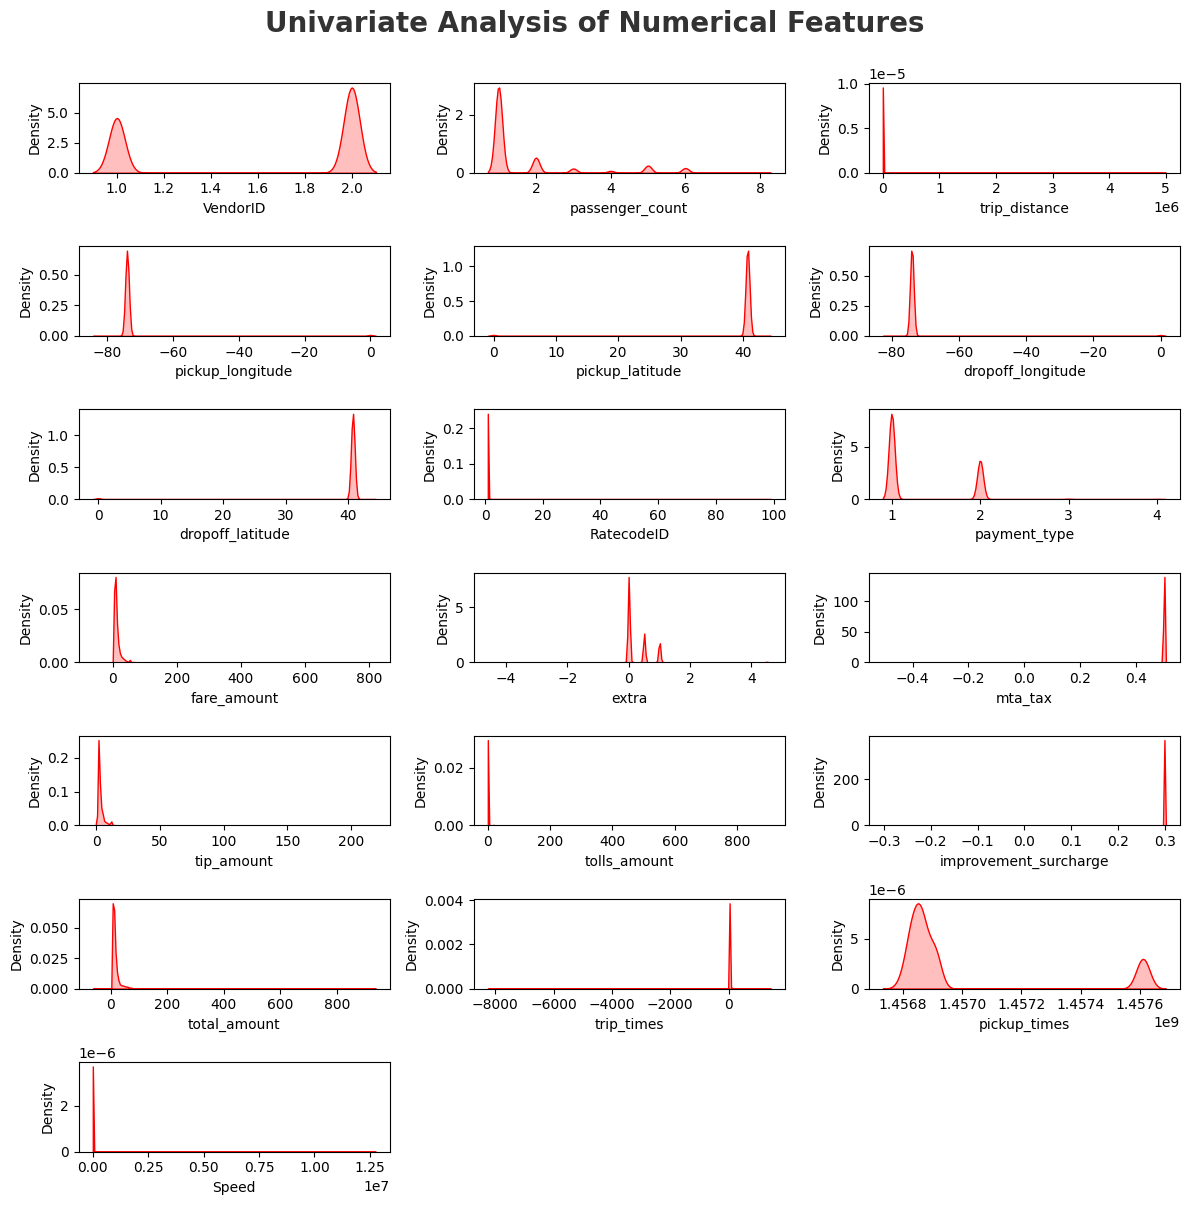

In [20]:
## Visualization Diagrams

plt.figure(figsize=(12, 12))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

nrows = int(np.ceil(len(numeric_features)/3))
ncols = min(3, len(numeric_features))

for i in range(len(numeric_features)):
    plt.subplot(nrows, ncols, i+1)
    sns.kdeplot(x=df[numeric_features[i]], shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


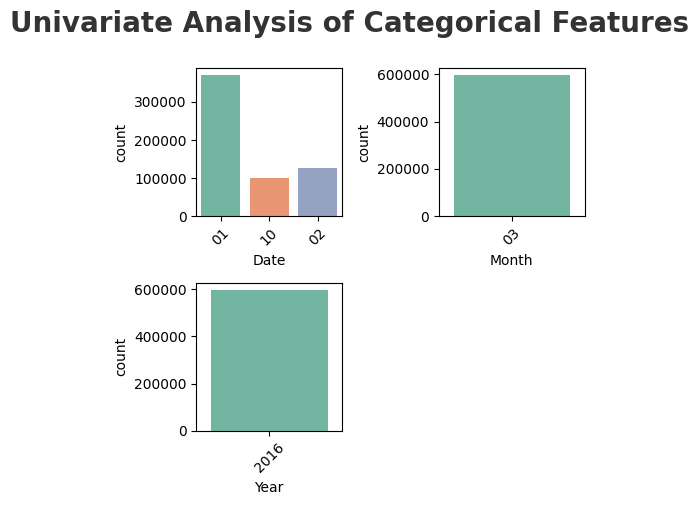

In [21]:
# categorical columns

plt.figure(figsize=(5, 5))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[categorical_features[i]], palette="Set2")
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
    
plt.show()


Covariance And Correlation

<ipython-input-22-ecf48ddcb9ef>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



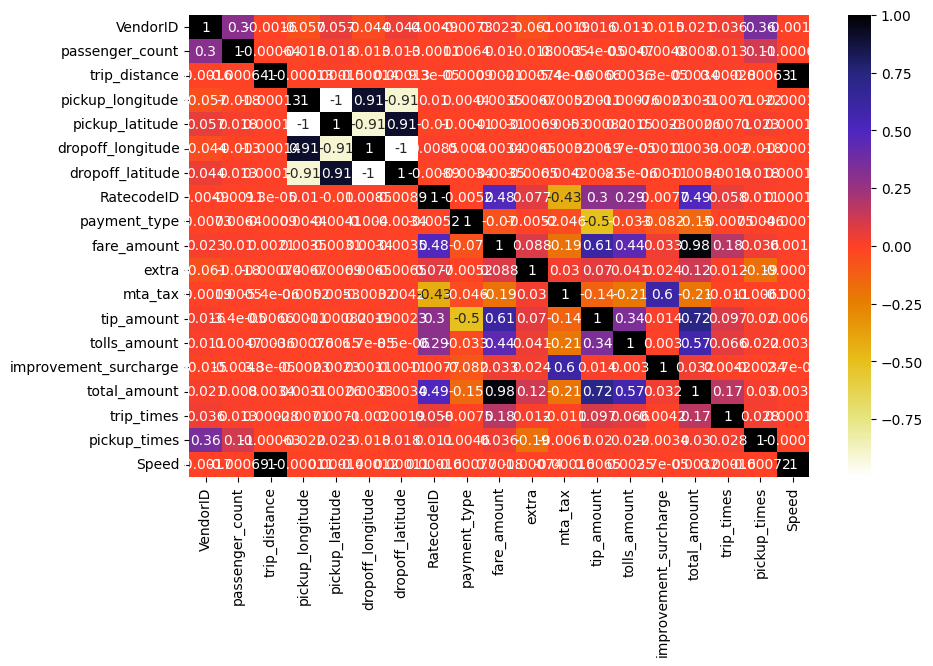

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

Removing the features

In [23]:
df = df.drop(['pickup_times','mta_tax','VendorID',	'RatecodeID',	'payment_type' ,	'fare_amount','extra','tip_amount',	'tolls_amount',	'improvement_surcharge','Date','Month','Year'], axis=1)
df.head()

passenger_count  trip_distance  pickup_longitude  pickup_latitude  \
0                1           2.50        -73.976746        40.765152   
1                1           2.90        -73.983482        40.767925   
2                2          19.98        -73.782021        40.644810   
7                1           6.20        -73.788773        40.647758   
8                1           0.70        -73.958221        40.764641   

   dropoff_longitude  dropoff_latitude  total_amount  trip_times      Speed  
0         -74.004265         40.746128         12.35    7.916667  18.947368  
1         -74.005943         40.733166         15.35   11.100000  15.675676  
2         -73.974541         40.675770         63.80   31.100000  38.546624  
7         -73.829208         40.712345         21.80   16.050000  23.177570  
8         -73.967896         40.762901          8.80    4.983333   8.428094

Finding Outliers and Removing them

1. Pickup longitude & latitue


In [24]:
df['pickup_longitude'].describe()

count    596726.000000
mean        -73.093781
std           8.016865
min         -82.706528
25%         -73.991058
50%         -73.980148
75%         -73.965118
max           0.000000
Name: pickup_longitude, dtype: float64

In [25]:
df['pickup_latitude'].describe()

count    596726.000000
mean         40.268571
std           4.416409
min           0.000000
25%          40.739586
50%          40.755669
75%          40.769447
max          43.563965
Name: pickup_latitude, dtype: float64

<Axes: >

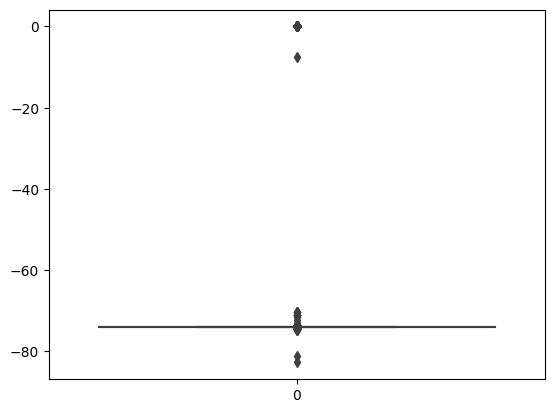

In [26]:
sns.boxplot(df['pickup_longitude'])

<Axes: >

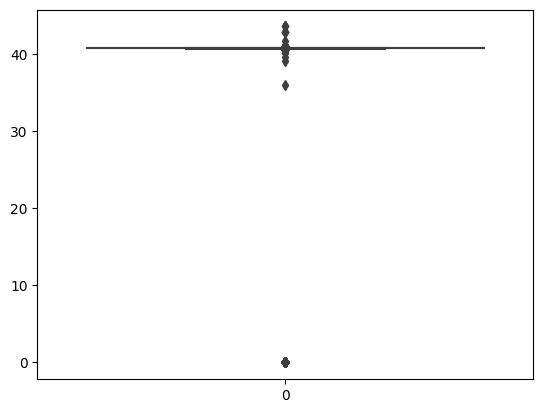

In [27]:
sns.boxplot(df['pickup_latitude'])

In [28]:
#Pickup Longitude & Latitude
df_new = df.loc[(df['pickup_longitude']>= -74.25559136315209)&(df['pickup_longitude']<= 40.496115395170364)&
                        (df['pickup_latitude']>= -73.7000090639354)&(df['pickup_latitude']<= 40.91553277700258)]

df_new.shape

(596679, 9)

<ipython-input-29-38a39884cae1>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-29-38a39884cae1>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




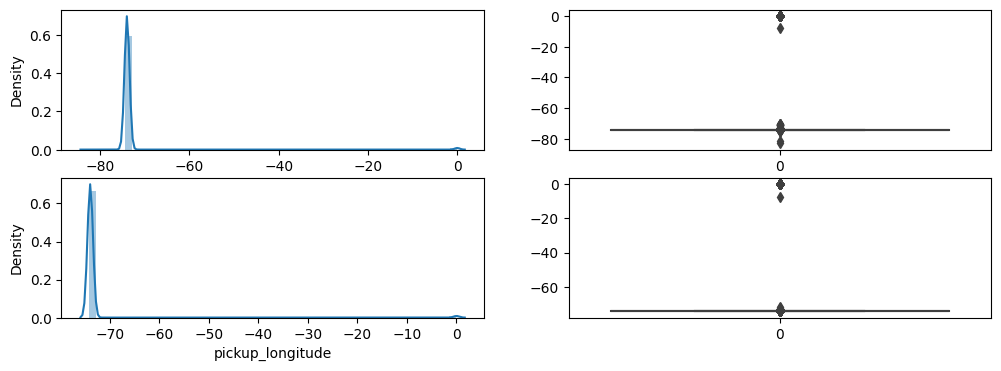

In [29]:
# Comparing pickup longitude

plt.figure(figsize=(12,4))
plt.subplot(2,2,1)
sns.distplot(df['pickup_longitude'])

plt.subplot(2,2,2)
sns.boxplot(df['pickup_longitude'])

plt.subplot(2,2,3)
sns.distplot(df_new['pickup_longitude'])

plt.subplot(2,2,4)
sns.boxplot(df_new['pickup_longitude'])

plt.show()

<ipython-input-30-bde8169e1d05>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-30-bde8169e1d05>:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




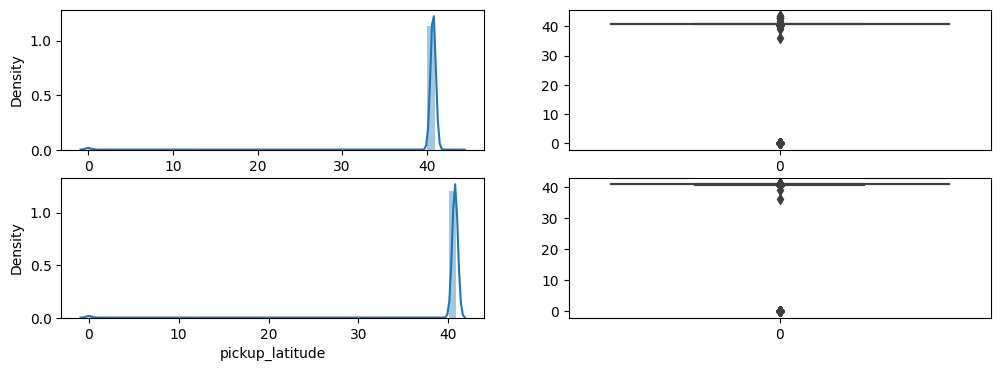

In [30]:
# Comparing pickup latitude

plt.figure(figsize=(12,4))

plt.subplot(2,2,1)
sns.distplot(df['pickup_latitude'])

plt.subplot(2,2,2)
sns.boxplot(df['pickup_latitude'])

plt.subplot(2,2,3)
sns.distplot(df_new['pickup_latitude'])

plt.subplot(2,2,4)
sns.boxplot(df_new['pickup_latitude'])

plt.show()

In [31]:
map = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# we will spot only first 100 outliers on the map
map_locations = df_new.head(10000)
for i,j in map_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['pickup_latitude'],j['pickup_longitude']))).add_to(map)
map

2. Dropoff longitude & latitude

In [32]:
df['dropoff_latitude'].describe()

count    596726.000000
mean         40.322778
std           4.166027
min           0.000000
25%          40.738583
50%          40.755524
75%          40.769493
max          43.563965
Name: dropoff_latitude, dtype: float64

In [33]:
df['dropoff_longitude'].describe()

count    596726.000000
mean        -73.192343
std           7.561860
min         -81.018280
25%         -73.990662
50%         -73.978729
75%         -73.963081
max           0.000000
Name: dropoff_longitude, dtype: float64

In [34]:
df['passenger_count'].unique()

array([1, 2, 3, 5, 4, 6, 8])

<Axes: >

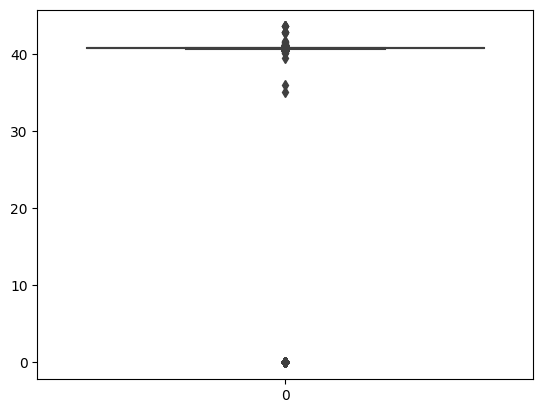

In [35]:
sns.boxplot(df['dropoff_latitude'])

<Axes: >

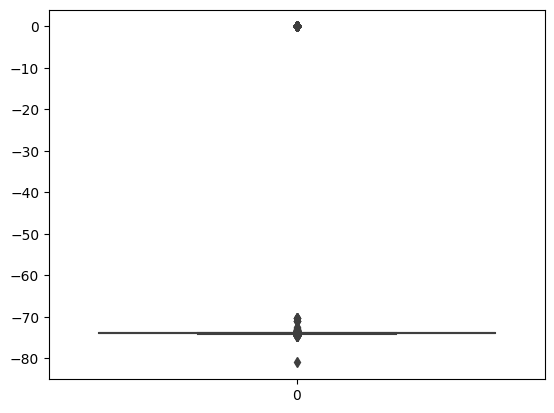

In [36]:
sns.boxplot(df['dropoff_longitude'])


In [37]:
#Dropup Longitude & Latitude
df_new = df.loc[(df['dropoff_longitude']>= -74.25559136315209)&(df['dropoff_longitude']<= 40.496115395170364)&
                        (df['dropoff_latitude']>= -73.829208)&(df['dropoff_latitude']<= 40.710987)]
df_new.shape

(48380, 9)

<ipython-input-39-1801afe59124>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-39-1801afe59124>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




KeyError: ignored

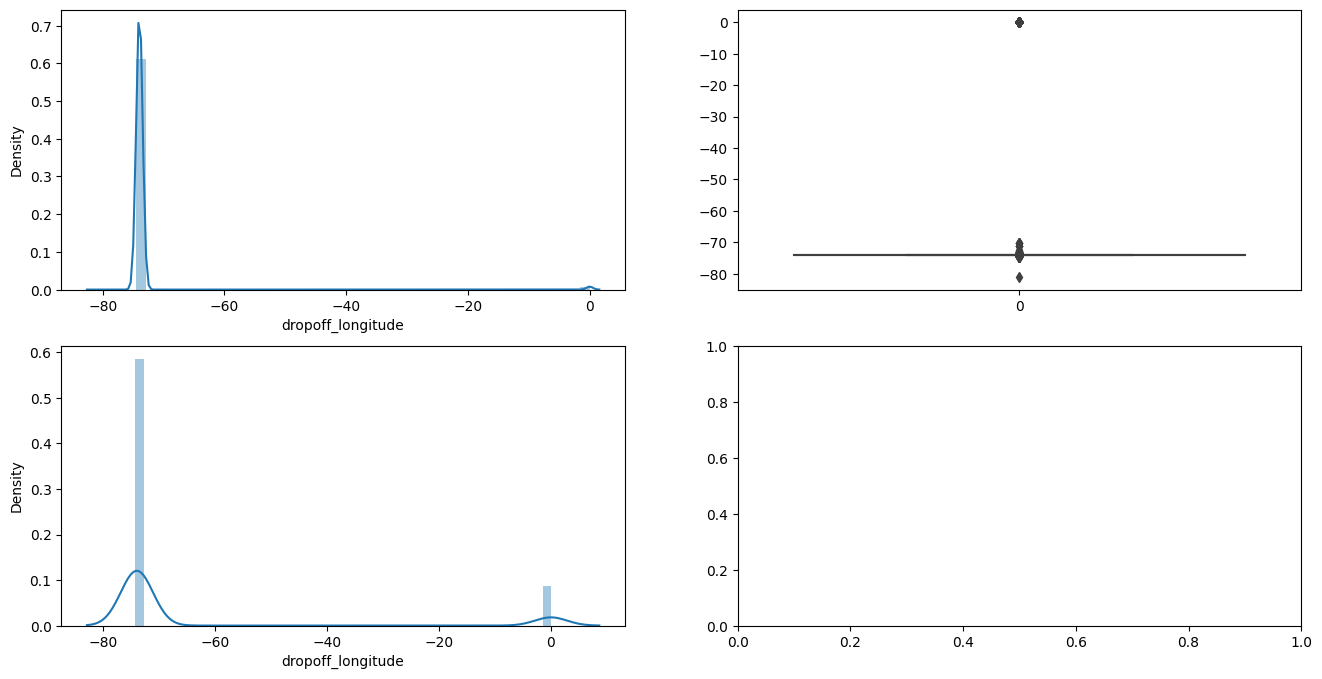

In [39]:
# Comparing dropoff longitude

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['dropoff_longitude'])

plt.subplot(2,2,2)
sns.boxplot(df['dropoff_longitude'])

plt.subplot(2,2,3)
sns.distplot(df_new['dropoff_longitude'])

plt.subplot(2,2,4)
sns.boxplot(df_new['dropoff_longitude'])

plt.show()

<ipython-input-40-af6e88948a2d>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-40-af6e88948a2d>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




KeyError: ignored

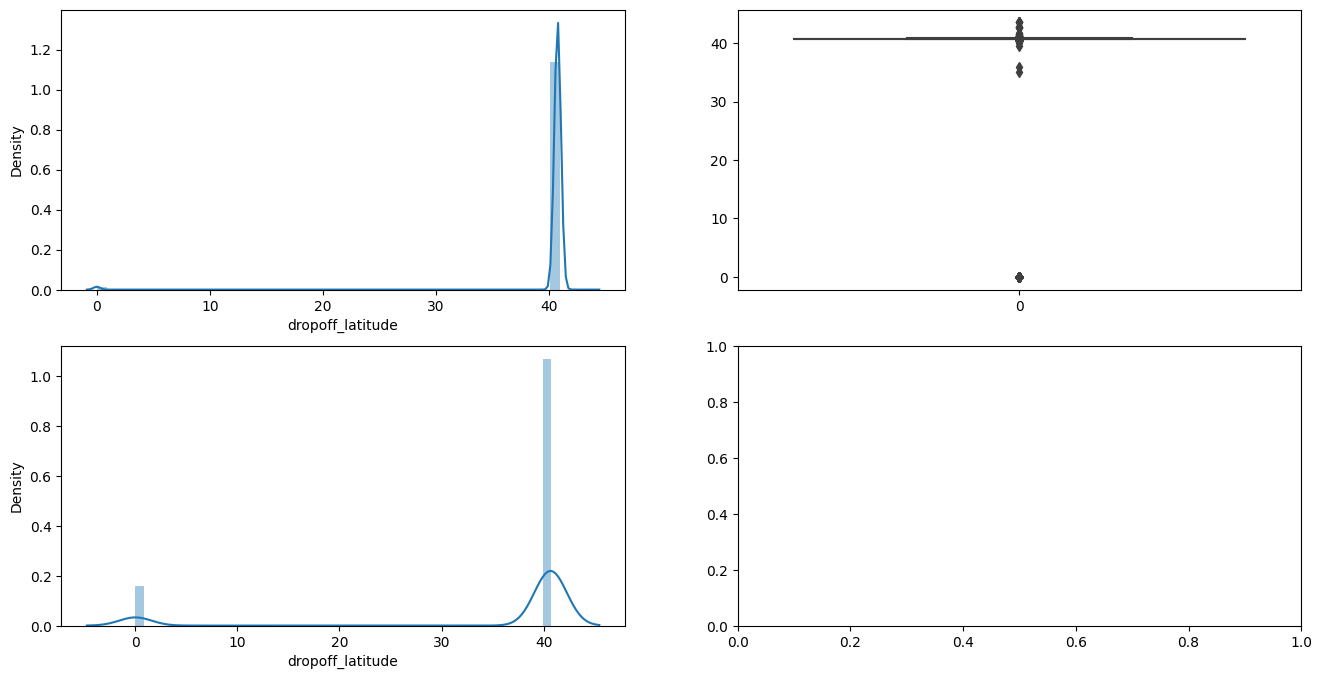

In [40]:
# Comparing dropoff latitude'

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['dropoff_latitude'])

plt.subplot(2,2,2)
sns.boxplot(df['dropoff_latitude'])

plt.subplot(2,2,3)
sns.distplot(df_new['dropoff_latitude'])

plt.subplot(2,2,4)
sns.boxplot(df_new['dropoff_latitude'])

plt.show()

In [41]:

map = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# plot first 100 outliers on the map
map_locations = df_new.head(10000)
for i,j in map_locations.iterrows():
    if int(j['dropoff_latitude']) != 0:
        folium.Marker(list((j['dropoff_latitude'],j['dropoff_longitude']))).add_to(map)
map

3. Trip Distance

In [42]:
df['trip_distance'].describe()

count    5.967260e+05
mean     1.121331e+01
std      6.472653e+03
min      1.000000e-02
25%      1.000000e+00
50%      1.610000e+00
75%      2.970000e+00
max      5.000000e+06
Name: trip_distance, dtype: float64

<Axes: >

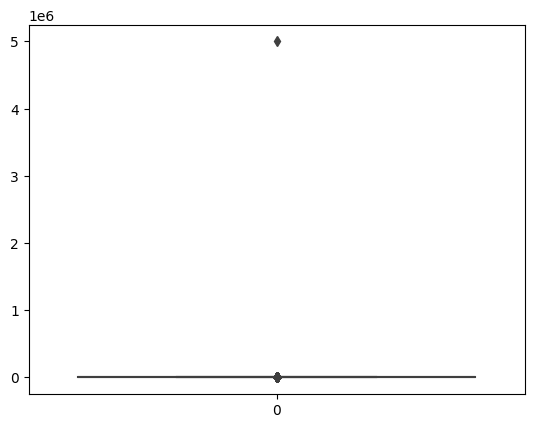

In [43]:
sns.boxplot(df['trip_distance'])

In [44]:
# IQR
percentage25 = df['trip_distance'].quantile(0.25)
percentage75 = df['trip_distance'].quantile(0.75)
iqr = percentage75 - percentage25
iqr

1.9700000000000002

In [45]:
upperlimit = percentage75 + 1.5 * iqr
lowerlimit = percentage25 - 1.5 * iqr
print("Upper limit",upperlimit)
print("Lower limit",lowerlimit)

Upper limit 5.925000000000001
Lower limit -1.955


In [46]:
#Capping the outliers

df_new = df.copy()

df_new['trip_distance'] = np.where(
   df_new['trip_distance'] > upperlimit,
    upperlimit,
    np.where(
        df_new['trip_distance'] < lowerlimit,
        lowerlimit,
      df_new['trip_distance']
    )
)
#np.where(condtion,true,false)
df_new.shape

(596726, 9)

<ipython-input-47-7402de0f9623>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-47-7402de0f9623>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




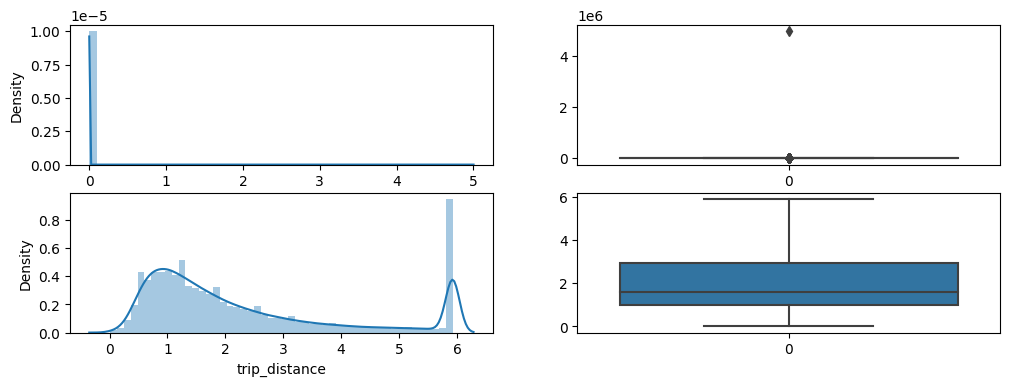

In [47]:
# Comparing

plt.figure(figsize=(12,4))
plt.subplot(2,2,1)
sns.distplot(df['trip_distance'])

plt.subplot(2,2,2)
sns.boxplot(df['trip_distance'])

plt.subplot(2,2,3)
sns.distplot(df_new['trip_distance'])

plt.subplot(2,2,4)
sns.boxplot(df_new['trip_distance'])

plt.show()

4.Speed

In [48]:
df['Speed'].describe()

count    5.967260e+05
mean     3.426766e+01
std      1.653812e+04
min     -1.588942e-02
25%      7.397260e+00
50%      9.955556e+00
75%      1.373456e+01
max      1.277502e+07
Name: Speed, dtype: float64

<Axes: >

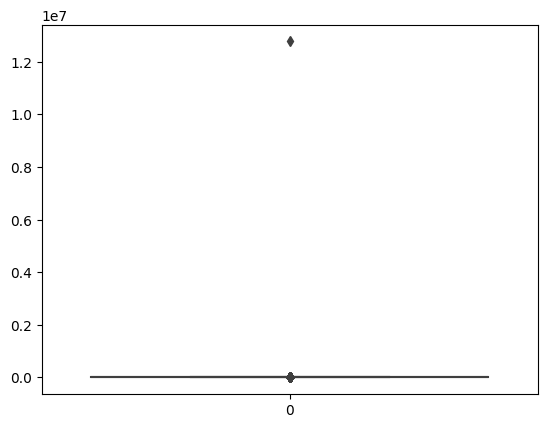

In [49]:
sns.boxplot(df['Speed'])

In [50]:
# IQR
percentage25 = df['Speed'].quantile(0.25)
percentage75 = df['Speed'].quantile(0.75)
iqr = percentage75 - percentage25
iqr

6.3372975518322

In [51]:
upperlimit = percentage75 + 1.5 * iqr
lowerlimit = percentage25 - 1.5 * iqr
print("Upper limit",upperlimit)
print("Lower limit",lowerlimit)

Upper limit 23.240504153553104
Lower limit -2.1086860537756964


In [52]:
#Capping the outliers

df_new = df.copy()

df_new['Speed'] = np.where(
   df_new['Speed'] > upperlimit,
    upperlimit,
    np.where(
        df_new['Speed'] < lowerlimit,
        lowerlimit,
      df_new['Speed']
    )
)

df_new.shape

(596726, 9)

<ipython-input-53-a18c021d61f0>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-53-a18c021d61f0>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




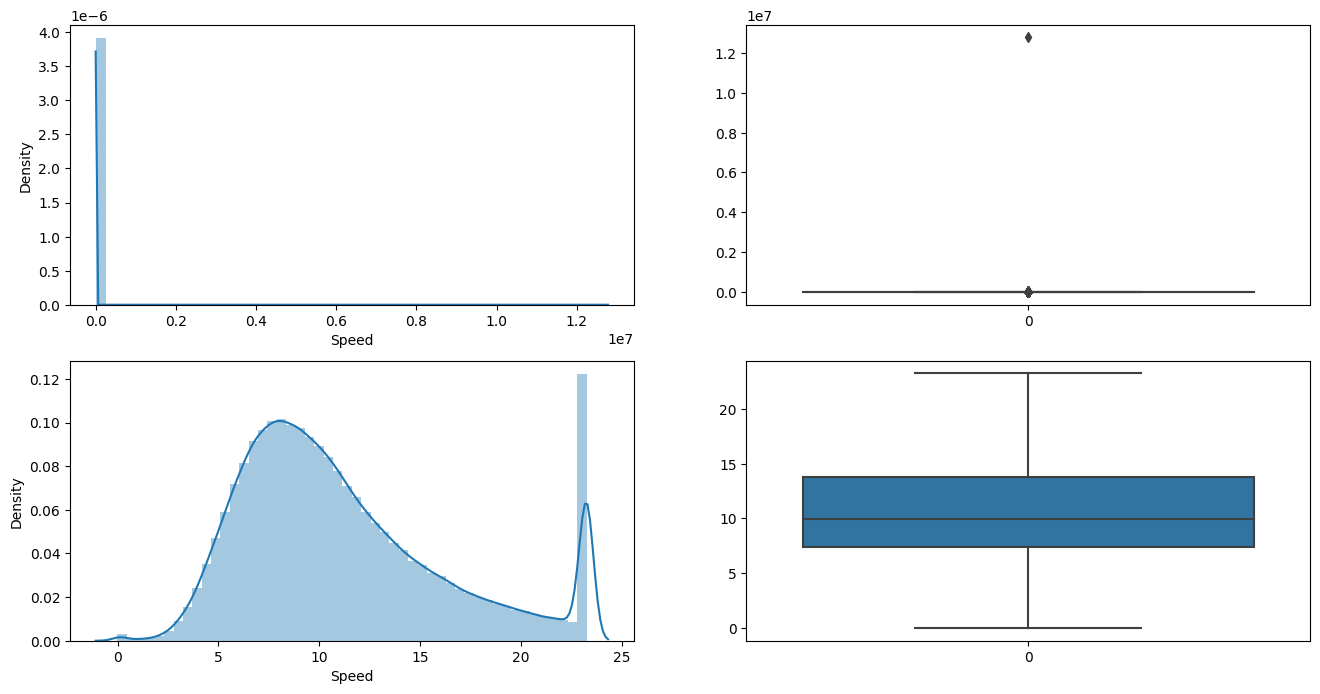

In [53]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Speed'])

plt.subplot(2,2,2)
sns.boxplot(df['Speed'])

plt.subplot(2,2,3)
sns.distplot(df_new['Speed'])

plt.subplot(2,2,4)
sns.boxplot(df_new['Speed'])

plt.show()

5. Trip Duration

In [54]:
df['trip_times'].describe()


count    596726.000000
mean         15.484701
std          53.105313
min       -8247.750000
25%           6.616667
50%          10.950000
75%          17.600000
max        1439.616667
Name: trip_times, dtype: float64

<Axes: >

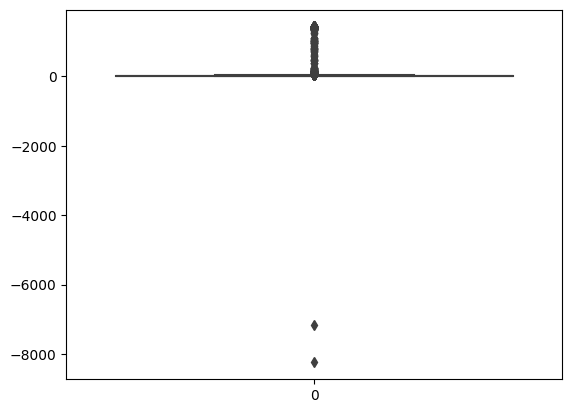

In [55]:
sns.boxplot(df['trip_times'])

In [56]:
upperlimit = df['trip_times'].quantile(0.99)
lowerlimit = df['trip_times'].quantile(0.01)
print("Upper limit",upperlimit)
print("Lower limit",lowerlimit)

Upper limit 55.03333333333333
Lower limit 1.6833333333333333


In [57]:
#Capping the outliers

df_new = df.copy()

df_new['trip_times'] = np.where(
   df_new['trip_times'] >= upperlimit,
    upperlimit,
    np.where(
        df_new['trip_times'] <= lowerlimit,
        lowerlimit,
      df_new['trip_times']
    )
)

df_new.shape

(596726, 9)

<ipython-input-58-8eb05c48e33a>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-58-8eb05c48e33a>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




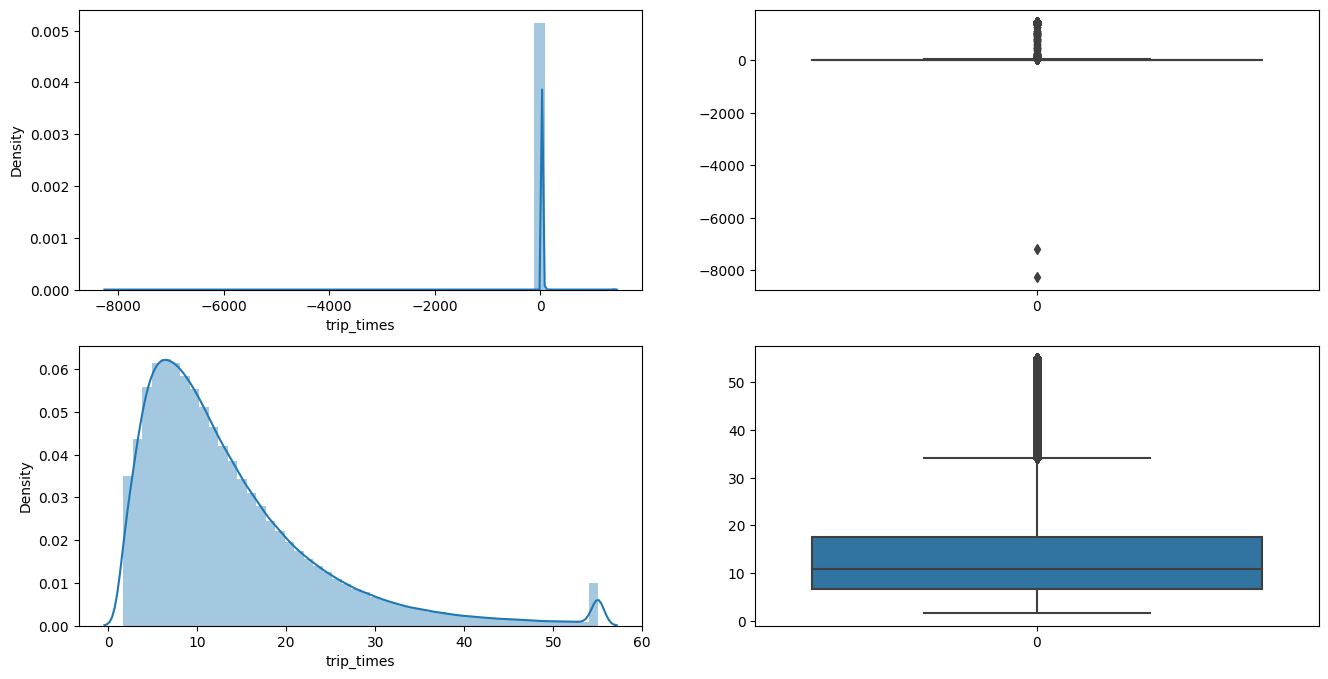

In [58]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['trip_times'])

plt.subplot(2,2,2)
sns.boxplot(df['trip_times'])

plt.subplot(2,2,3)
sns.distplot(df_new['trip_times'])

plt.subplot(2,2,4)
sns.boxplot(df_new['trip_times'])

plt.show()

6.Total Amount

In [59]:
df['total_amount'].describe()

count    596726.000000
mean         15.665870
std          13.073627
min         -60.800000
25%           8.300000
50%          11.760000
75%          17.250000
max         934.370000
Name: total_amount, dtype: float64

<Axes: >

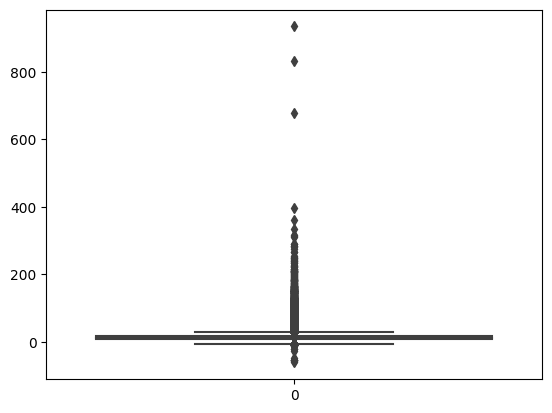

In [60]:
sns.boxplot(df['total_amount'])

In [61]:
upperlimit = df['total_amount'].quantile(0.99)
lowerlimit = df['total_amount'].quantile(0.01)
print("Upper limit",upperlimit)
print("Lower limit",lowerlimit)

Upper limit 70.01
Lower limit 4.8


In [62]:
#Capping the outliers

df_new = df.copy()

df_new['total_amount'] = np.where(df_new['total_amount'] >= upperlimit,
    upperlimit,
    np.where(df_new['total_amount'] <= lowerlimit,
    lowerlimit,
    df_new['total_amount']
    )
)

df_new.shape

(596726, 9)

<ipython-input-63-4a066b3358b2>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-63-4a066b3358b2>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




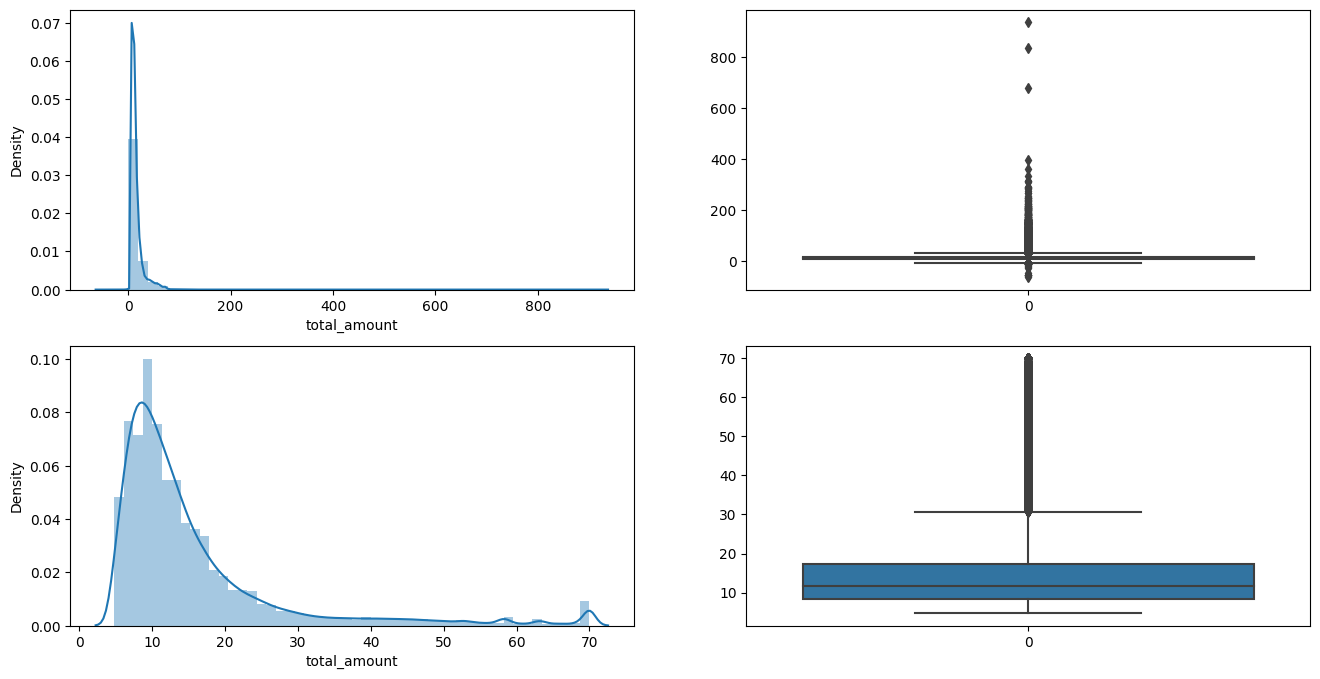

In [63]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['total_amount'])

plt.subplot(2,2,2)
sns.boxplot(df['total_amount'])

plt.subplot(2,2,3)
sns.distplot(df_new['total_amount'])

plt.subplot(2,2,4)
sns.boxplot(df_new['total_amount'])

plt.show()

7. Number of Passenger 

In [64]:
df['passenger_count'].describe()

count    596726.000000
mean          1.683211
std           1.376581
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           8.000000
Name: passenger_count, dtype: float64

<Axes: >

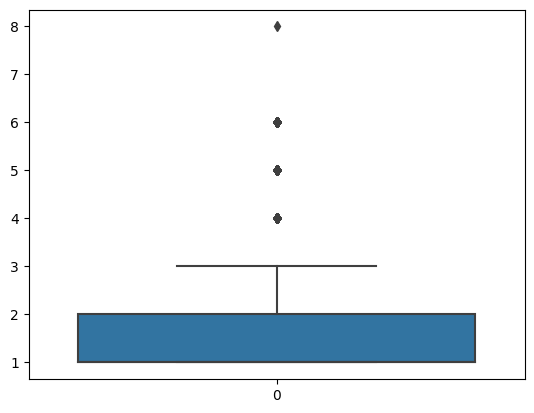

In [65]:
sns.boxplot(df['passenger_count'])

In [66]:
# IQR
percentage25 = df['passenger_count'].quantile(0.25)
percentage75 = df['passenger_count'].quantile(0.75)
iqr = percentage75 - percentage25
iqr

1.0

In [67]:
upperlimit = percentage75 + 1.5 * iqr
lowerlimit = percentage25 - 1.5 * iqr
print("Upper limit",upperlimit)
print("Lower limit",lowerlimit)

Upper limit 3.5
Lower limit -0.5


In [68]:
#Capping the outliers

df_new = df.copy()

df_new['passenger_count'] = np.where(
   df_new['passenger_count'] > upperlimit,
    upperlimit,
    np.where(
        df_new['passenger_count'] < lowerlimit,
        lowerlimit,
      df_new['passenger_count']
    )
)

df_new.shape

(596726, 9)

<ipython-input-69-bed0cb22a724>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-69-bed0cb22a724>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




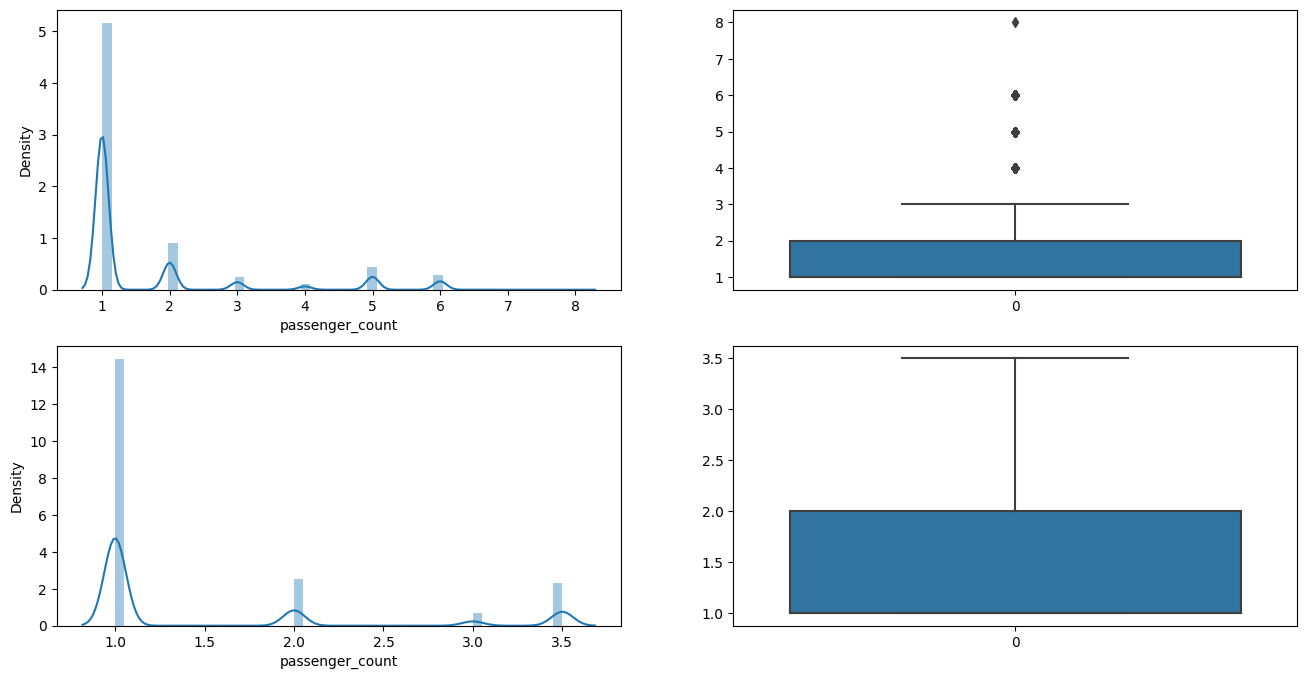

In [69]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['passenger_count'])

plt.subplot(2,2,2)
sns.boxplot(df['passenger_count'])

plt.subplot(2,2,3)
sns.distplot(df_new['passenger_count'])

plt.subplot(2,2,4)
sns.boxplot(df_new['passenger_count'])

plt.show()

Feature Normalization-Min Max Scaler

In [70]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
min_max.fit(df_new[["passenger_count", "trip_distance", "trip_times", "Speed", "total_amount",'pickup_longitude','pickup_latitude','dropoff_latitude','dropoff_longitude']])

pd.DataFrame(min_max.transform(df_new[["passenger_count", "trip_distance", "trip_times", "Speed", "total_amount",'pickup_longitude','pickup_latitude','dropoff_latitude','dropoff_longitude']]),
             columns=["passenger_count", "trip_distance", "trip_times", "Speed", "total_amount",'pickup_longitude','pickup_latitude','dropoff_latitude','dropoff_longitude'])

passenger_count  trip_distance  trip_times         Speed  \
0                   0.0   4.980000e-07    0.852210  1.484402e-06   
1                   0.0   5.780000e-07    0.852538  1.228301e-06   
2                   0.4   3.994000e-06    0.854603  3.018588e-06   
3                   0.0   1.238000e-06    0.853049  1.815532e-06   
4                   0.0   1.380000e-07    0.851907  6.609762e-07   
...                 ...            ...         ...           ...   
596721              0.4   7.000000e-08    0.851652  6.730848e-07   
596722              0.4   3.720000e-07    0.853120  5.261103e-07   
596723              0.0   1.440000e-07    0.851747  9.998554e-07   
596724              0.0   3.260000e-07    0.852617  6.503337e-07   
596725              0.0   8.780000e-07    0.855798  4.853984e-07   

        total_amount  pickup_longitude  pickup_latitude  dropoff_latitude  \
0           0.073505          0.105551         0.935754          0.935317   
1           0.076520          0.105470         0.935818          0.935020   
2           0.125205          0.107906         0.932992          0.933702   
3           0.083001          0.107824         0.933059          0.934542   
4           0.069938          0.105775         0.935742          0.935702   
...              ...               ...              ...               ...   
596721      0.066883          0.105435         0.935014          0.935020   
596722      0.074962          0.105522         0.935341          0.935766   
596723      0.068019          0.105447         0.935831          0.935703   
596724      0.072912          0.105407         0.935289          0.934877   
596725      0.094054          0.105606         0.936476          0.935389   

        dropoff_longitude  
0                0.086573  
1                0.086553  
2                0.086940  
3                0.088734  
4                0.087022  
...                   ...  
596721           0.086858  
596722           0.086876  
596723           0.086709  
596724           0.086624  
596725           0.086877  

[596726 rows x 9 columns]

In [71]:
df_new = df_new.drop(['pickup_longitude','pickup_latitude','dropoff_latitude','dropoff_longitude'], axis=1)
df_new.head()

passenger_count  trip_distance  total_amount  trip_times      Speed
0              1.0           2.50         12.35    7.916667  18.947368
1              1.0           2.90         15.35   11.100000  15.675676
2              2.0          19.98         63.80   31.100000  38.546624
7              1.0           6.20         21.80   16.050000  23.177570
8              1.0           0.70          8.80    4.983333   8.428094

In [72]:
train_1 = df_new[:2000]
test_1 = df_new[6000:10000]

In [73]:
train_1.head()

passenger_count  trip_distance  total_amount  trip_times      Speed
0              1.0           2.50         12.35    7.916667  18.947368
1              1.0           2.90         15.35   11.100000  15.675676
2              2.0          19.98         63.80   31.100000  38.546624
7              1.0           6.20         21.80   16.050000  23.177570
8              1.0           0.70          8.80    4.983333   8.428094


LSTM model

```
# This is formatted as code
```



In [74]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,BatchNormalization
# faster one
from keras.layers import CuDNNLSTM
# to create custom metrics like RMSE
from keras import backend

In [75]:
def convert_to_sequence_multiple(train_data, test_data, time_steps):
  feature_columns = ["passenger_count", "trip_distance", "trip_times", "Speed", "total_amount"]
  scaler = MinMaxScaler(feature_range=(0,1))
  train_length = len(train_data)
  test_length = len(test_data)
  num_of_features = len(feature_columns) 
  
  train_data = pd.DataFrame(scaler.fit_transform(train_data), columns=feature_columns)
  test_data = pd.DataFrame(scaler.transform(test_data), columns=feature_columns)
  
  lags = range(time_steps, 0, -1)
  train_lagged_data = [train_data[["total_amount"]]]
  test_lagged_data = [test_data[["total_amount"]]]

  for lag in lags:
    current_lag_df_train = train_data.shift(lag)
    current_lag_df_train.columns = [f"{c}_{lag}" for c in feature_columns]
    
    current_lag_df_test = test_data.shift(lag)
    current_lag_df_test.columns = [f"{c}_{lag}" for c in feature_columns]
    
    train_lagged_data.append(current_lag_df_train)
    test_lagged_data.append(current_lag_df_test)

  train_data = pd.concat(train_lagged_data, axis=1).dropna()
  test_data = pd.concat(test_lagged_data, axis=1).dropna()
  
  # reduce length to reflect dropped null rows
  train_length -= time_steps
  test_length -= time_steps
  
  X_train = train_data.iloc[:, 1:].values.reshape(train_length, time_steps, num_of_features)
  X_test = test_data.iloc[:, 1:].values.reshape(test_length, time_steps, num_of_features)
  y_train = train_data.iloc[:, 0]
  y_test = test_data.iloc[:, 0]
  
  return X_train, X_test, y_train, y_test, scaler

In [76]:
# root mean squared error (rmse) for regression (only for Keras tensors)
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression  (only for Keras tensors)
def mse(y_true, y_pred):
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

In [77]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))


In [78]:
def stacked_lstm(train_data, test_data, lags, num_features, epochs):
  X_train, X_test, y_train, y_test, scaler = convert_to_sequence_multiple(train_data, test_data, lags)
  print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
  
  model = Sequential()
  model.add(LSTM(40, return_sequences=True, input_shape=(lags, num_features)))
  model.add(Dropout(0.5))
  model.add(LSTM(32, return_sequences=True))
  model.add(Dropout(0.5))
  model.add(LSTM(32))
 
  # model.add(LSTM(40, input_shape=(10,1)))
  # model.add(32)
  # model.add(32)
  model.add(Dense(1, activation="sigmoid"))

  model.compile(loss="mse", optimizer="rmsprop", metrics=[rmse])
  #model.summary()
  history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test),batch_size=200, verbose=0)
  return model, history, scaler, X_train, y_train,X_test, y_test

In [79]:
def plot_training_metrics(history, scaler=None):
  hloss = np.zeros((100, 5))
  hloss[:, -1] = history.history["loss"]
  hloss = scaler.inverse_transform(np.sqrt(hloss))[:, -1].flatten()
  
  hval_loss = np.zeros((100, 5))
  hval_loss[:, -1] = history.history["val_loss"]
  hval_loss = scaler.inverse_transform(np.sqrt(hval_loss))[:, -1].flatten()
  
#   hloss = scaler.inverse_transform(np.sqrt(history.history["loss"]).reshape(-1,1)).flatten()
#   hval_loss = scaler.inverse_transform(np.sqrt(history.history["val_loss"]).reshape(-1,1)).flatten()
  
  hrmse = np.zeros((100, 5))
  hrmse[:, -1] = history.history["rmse"]
  hrmse = scaler.inverse_transform(hrmse)[:, -1].flatten()
  
  hval_rmse = np.zeros((100, 5))
  hval_rmse[:, -1] = history.history["val_rmse"]
  hval_rmse = scaler.inverse_transform(hval_rmse)[:, -1].flatten()
  
#   hrmse =  scaler.inverse_transform(np.array(history.history["rmse"]).reshape(-1,1)).flatten()
#   hval_rmse =  scaler.inverse_transform(np.array(history.history["val_rmse"]).reshape(-1,1)).flatten()

  # diagnose overfitting, underfitting
  configure_plotly_browser_state()
  trace1 = go.Scatter(y=hloss, mode="lines", name="train-loss") 
  trace2 = go.Scatter(y=hval_loss, mode="lines", name="val-loss") 
  trace3 = go.Scatter(y=hrmse, mode="lines", name="train-rmse") 
  trace4 = go.Scatter(y=hval_rmse, mode="lines", name="val-rmse") 

  loss_trace= [trace1, trace2]
  mse_trace = [trace3, trace4]

  fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('', ''))
  # nice to add plots that have connection
  fig.add_traces(loss_trace, rows=[1]*len(loss_trace), cols=[1]*len(loss_trace))
  fig.add_traces(mse_trace, rows=[1]*len(mse_trace), cols=[2]*len(mse_trace))                                                         


  fig['layout']['xaxis1'].update(title='Epoch')
  fig['layout']['xaxis2'].update(title='Epoch')


  fig['layout']['yaxis1'].update(title='Loss')
  fig['layout']['yaxis2'].update(title='RMSE')


  fig['layout'].update(height=900, width=1200, title='Is the model learning?')
  config={'scrollZoom':False,'displayModeBar':True, "showLink":False, 'showTips':False}
  return fig, config
  pyo.iplot(fig, filename='make-subplots-multiple-with-titles', config=config)


In [80]:
model_five, history_five, scaler_five, X_train, y_train,X_test, y_test = stacked_lstm(train_1, test_1, 36, 5, 100)

(1964, 36, 5) (1964,) (3964, 36, 5) (3964,)


In [81]:
# inverse transform
# print train and validation accuracy

# scaler requires 1 by 5 array. I am interested in the scaler 
# for the last feature(fare_amount)
rmse_t = np.zeros((1,5))
rmse_t[0, -1] = history_five.history["rmse"][-1]
rmse_t = scaler_five.inverse_transform(rmse_t)[0, -1]

vrmse_t = np.zeros((1,5))
vrmse_t[0, -1] = history_five.history["val_rmse"][-1]
vrmse_t = scaler_five.inverse_transform(vrmse_t)[0, -1]

print("{}, {}".format(rmse_t, vrmse_t))

3.894307528778375, 4.383151517762387


In [82]:
x, c = plot_training_metrics( history_five, scaler_five)

/usr/local/lib/python3.9/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
pyo.iplot(x)

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(history_five.history['rmse'])
plt.plot(history_five.history['val_rmse'])
plt.ylim(0, 1)
plt.title('model accuracy ')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(history_five.history['loss'])
plt.plot(history_five.history['val_loss'])
plt.title('model loss ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.ylim([0,2])